# Dataset Draft

Dennis Chan 15833526 

Stanley Si Lin Wu 15417190 

Michael Dong 15804232 

Sander Neele 15857719 

Groep nummer: B1 (#1) 

# Titel
Factoren die mensen zijn voorkeur voor films of series beïnvloeden

# Beschrijving

IMDb is de bekendste website voor het beoordelen van films en series en er bestaat duidelijke tegenstellingen tussen films en series. Sommige mensen vinden films beter, terwijl sommige juist series beter vinden. Maar welke factoren bepalen dan deze voorkeuren? In dit project gaan we dus de data analyseren om te bepalen wat precies deze verschillen veroorzaakt. Sommigen vinden series leuker vanwege de grote hoeveelheid detail en zij liever thuis kijken, terwijl anderen films waarderen omdat ze een compleet verhaal in korte tijd vertellen en liever in de bioscoop kijken.  

In [86]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Dataset 1: IMDB Top 1000 Movies

https://www.kaggle.com/datasets/octopusteam/imdb-top-1000-movies 

Hoeveelheid datapunten: 1000 records
 
Hoeveelheid variabelen in de dataset: 6 variabelen 

De database bevat de top 1000 best beoordeelde films op IMDb, elk met minstens 10.000 ratings. Voor elke film is de titel, genre, aantal votes, rating en de releasedatum genoteerd. Deze gegevens zijn verkregen via een (onofficiële) IMDb API en kunnen inzicht geven in trends en voorkeuren van gebruikers. 

In [87]:
data = pd.read_csv('data/movies.csv')
data.head(n=10)

,id,title,genres,averageRating,numVotes,releaseYear
0,tt0111161,The Shawshank Redemption,Drama,9.3,3057007,1994
1,tt0068646,The Godfather,"Crime, Drama",9.2,2134065,1972
2,tt0252487,The Chaos Class,Comedy,9.2,44602,1975
3,tt33175825,Attack on Titan the Movie: The Last Attack,"Action, Adventure, Animation",9.2,17305,2024
4,tt0259534,Ramayana: The Legend of Prince Rama,"Action, Adventure, Animation",9.1,16474,1993
5,tt0468569,The Dark Knight,"Action, Crime, Drama",9.0,3031913,2008
6,tt0167260,The Lord of the Rings: The Return of the King,"Adventure, Drama, Fantasy",9.0,2085825,2003
7,tt0108052,Schindler's List,"Biography, Drama, History",9.0,1529796,1993
8,tt0071562,The Godfather Part II,"Crime, Drama",9.0,1435894,1974
9,tt0050083,12 Angry Men,"Crime, Drama",9.0,931547,1957


# Dataset 2: IMBD Top 1000 Series


https://www.kaggle.com/datasets/octopusteam/imdb-top-1000-tv-series 

Hoeveelheid datapunten: 1000 records 

Hoeveelheid variabelen in de dataset: 6 variabelen


De database bevat een top 1000 top rated TV series in IMDb met minstens 10000 ratings. Daarin staat de titel, genre, aantal votes, rating en de releasedatum van de film. De data is verkregen door middel van een (Onofficieel) IMDb API, te vinden op RapidAPI. 


In [88]:
data = pd.read_csv('data/tvseries.csv')
data.head(n=10)

,id,title,genres,averageRating,numVotes,releaseYear
0,tt0903747,Breaking Bad,"Crime, Drama, Thriller",9.5,2341969,2008
1,tt0185906,Band of Brothers,"Action, Drama, History",9.4,564041,2001
2,tt0795176,Planet Earth,"Documentary, Family",9.4,227819,2006
3,tt5491994,Planet Earth II,Documentary,9.4,166992,2016
4,tt5152226,Tree of Life,Drama,9.4,18826,2014
5,tt7366338,Chernobyl,"Drama, History, Thriller",9.3,954055,2019
6,tt0417299,Avatar: The Last Airbender,"Action, Adventure, Animation",9.3,408049,2005
7,tt0306414,The Wire,"Crime, Drama, Thriller",9.3,404808,2002
8,tt30263074,Sapne Vs Everyone,Drama,9.3,73898,2023
9,tt6769208,Blue Planet II,Documentary,9.3,52095,2017


# Dataset Preprocessing 1

In [89]:
# Laad beide CSV-bestanden
df1 = pd.read_csv("data/movies.csv")  # Hier zit bijvoorbeeld 'Country' in
df2 = pd.read_csv("data/tvseries.csv")  # Hier zit 'Location' i.p.v. 'Country' in

# Voeg een 'type' kolom toe om films/series te onderscheiden
df1["type"] = "film"
df2["type"] = "serie"

# Voeg beide DataFrames samen
combined = pd.concat([df1, df2])


# Groepeer per releaseYear en tel votes op
result = (
    combined.groupby("releaseYear", as_index=False)
    .agg({
        "numVotes": "sum",  # Tel alle votes op per jaar
        "title": lambda x: " | ".join(x),  # Combineer titels met scheidingsteken
        "type": lambda x: " + ".join(x)    # Combineer types (film + serie)
    })
    .rename(columns={"title": "titles_combined"})  # Hernoem voor duidelijkheid
)


result.to_csv("data/combined_votes_by_year.csv", index=True)

# Data Preprocessing 2

In [90]:
# 1. Laad beide CSV-bestanden
df1 = pd.read_csv("data/movies.csv")  # Films
df2 = pd.read_csv("data/tvseries.csv")  # Series

# 2. Voeg een 'type' kolom toe
df1["type"] = "film"
df2["type"] = "serie"

# 3. Voeg beide DataFrames samen
combined = pd.concat([df1, df2])

# 4. Bereken gemiddelde rating per jaar
result = (
    combined.groupby("releaseYear", as_index=False)
    .agg({
        "averageRating": "mean",  # Gemiddelde rating per jaar
        "numVotes": "sum",        # Totale votes per jaar (optioneel)
        "title": lambda x: x.nunique(),  # Aantal unieke titels per jaar
        "type": lambda x: ", ".join(x.unique())  # Unieke types per jaar
    })
    .rename(columns={
        "averageRating": "mean_rating",
        "numVotes": "total_votes",
        "title": "unique_titles_count"
    })
)

# 5. Sla het resultaat op
result.to_csv("data/combined_stats_by_year.csv", index=True)

# Data preprocessing 3

In [91]:
import pandas as pd

# Load both CSV files
df1 = pd.read_csv("data/movies.csv")  # Films
df2 = pd.read_csv("data/tvseries.csv")  # Series

# Add type column
df1["type"] = "film"
df2["type"] = "serie"

# Combine both DataFrames
combined = pd.concat([df1, df2])

# Expand genres - create a row for each genre per movie/series
expanded_rows = []
for _, row in combined.iterrows():
    if pd.notna(row['genres']):
        genres_list = [g.strip() for g in str(row['genres']).split(',')]
        for genre in genres_list:
            if genre:
                expanded_rows.append({
                    'releaseYear': row['releaseYear'],
                    'genre': genre,
                    'mean_rating': row['averageRating'],
                    'numVotes': row['numVotes'],
                    'title': row['title']
                })

expanded_df = pd.DataFrame(expanded_rows)

# Group by releaseYear and genre, calculate mean rating for each genre per year
result = (
    expanded_df.groupby(["releaseYear", "genre"], as_index=False)
    .agg({
        "mean_rating": "mean",  # Average rating per genre per year
        "numVotes": "sum",      # Total votes per genre per year
        "title": lambda x: x.nunique()  # Number of unique titles per genre per year
    })
    .rename(columns={
        "title": "unique_titles_count"
    })
)

# Save result
result.to_csv("data/combined_stats_by_genre_year.csv", index=False)

# Perspectief 1

In onze moderne social media zijn zowel films als series populair, maar toch hebben ze andere behoeftes. Films bieden een korte en eenmalige beleving met relatief weinig inspanning, terwijl series veel langer zijn, waardoor  meer karakterontwikkeling en een diepere verhaallijn mogelijk is. Daarnaast sluit het kijken van series thuis beter aan bij de levensstijl van vandaag dankzij  Netflix en HBO. Door de coronapandemie zal deze trend nog meer versterkt worden, omdat mensen meer tijd thuis doorbrachten, is het seriekijken verder toegenomen.  Onze analyse van IMDB top 1000 films en top 1000 series bevestigt dat series over het algemeen van hoger kwaliteit zijn en daardoor ook hoger scoren dan films. 

# Argument 1: 
We zien dat films veel meer stemmen krijgt dan series, wat blijkt uit de heat graph (grafiek hierboven). De films zijn duideliujk roder (dus meer stemmen) voor alle bijna alle jaren. Dat betekent dat kwalitatieve films significant meer worden bekeken. Films kregen sinds 1980 duidelijk ook meer stemmen. Tot ongeveer 2005 is er vrijwel geen bijzondere activiteit voor series zichtbaar, tot de opkomst van streamingsdiensten als netflix.  Daarnaast is het opvallend dat in recentere jaren rond 2020-2024 series juist populairder zijn, door de coronapandemie. Dit zien we ook terug in de grafiek hieronder.




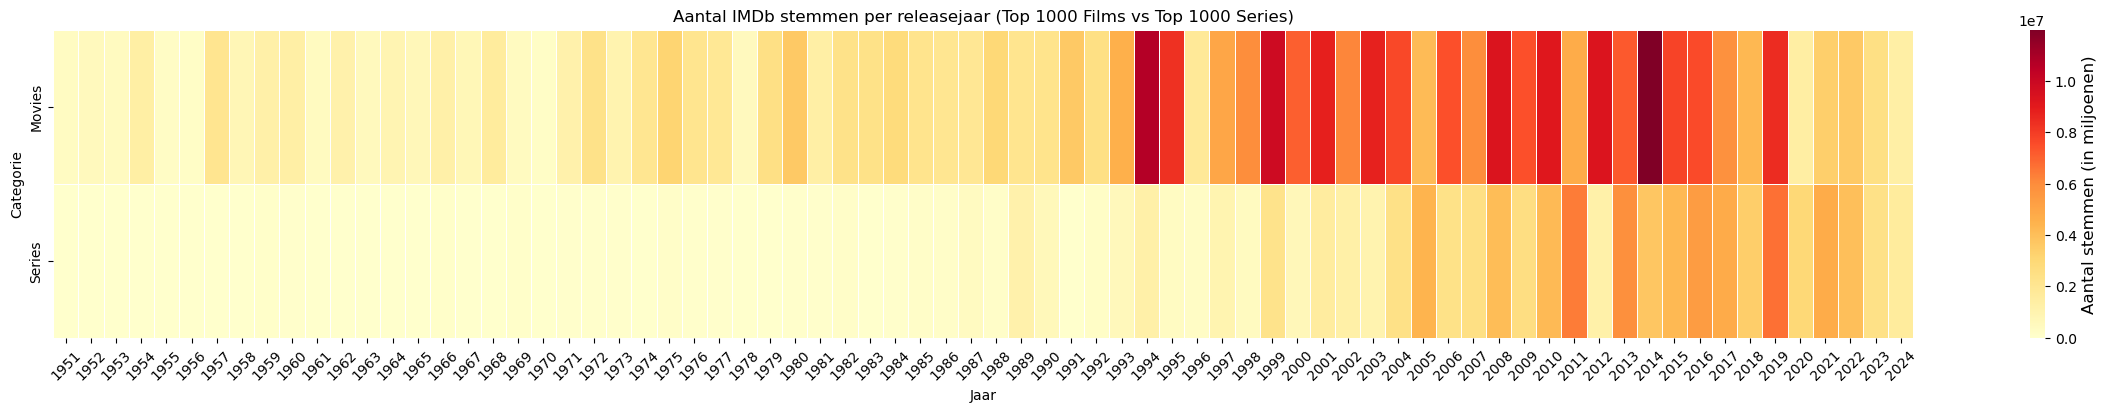

In [92]:


############# FILMS + SERIES APART######################### 



# --- Movies ---
movies_df = pd.read_csv("data/movies.csv")
movies_votes = movies_df.groupby('releaseYear')['numVotes'].sum().reindex(range(1951, 2025)).fillna(0)
movies_votes.name = 'Movies'

# --- Series ---
series_df = pd.read_csv("data/tvseries.csv")
series_votes = series_df.groupby('releaseYear')['numVotes'].sum().reindex(range(1951, 2025)).fillna(0)
series_votes.name = 'Series'

# Combine into one DataFrame for heatmap (rows = categorieën, columns = jaren)
heatmap_df = pd.concat([movies_votes, series_votes], axis=1).T

plt.figure(figsize=(30, 4))
ax = sns.heatmap(
    heatmap_df,
    cmap='YlOrRd',
    cbar=True,
    xticklabels=range(1951, 2025),
    linewidths=0.5,
    linecolor='white'
)

# Colorbar label aanpassen
colorbar = ax.collections[0].colorbar
colorbar.set_label('Aantal stemmen (in miljoenen)', fontsize=12)

# Formatter instellen: toon als miljoenen

plt.title('Aantal IMDb stemmen per releasejaar (Top 1000 Films vs Top 1000 Series)')
plt.xlabel('Jaar')
plt.ylabel('Categorie')
plt.xticks(rotation=45)
plt.show()

In deze grafiek wordt er een vergelijking gemaakt tussen aantal votes van de films en series door de jaren heen. In de Y-as zit de verdeling tussen series en films en in de X-as zitten de jaren. Aan de rechterkant van de grafiek zit de legenda waar de aantal votes op miljoenen wordt gezet, met dat gezegd hoe donkerder het is hoe meer votes er zijn in dat bepaald jaar. Hieruit kunnen we zien hoe donkerder de reep in dat bepaald jaar hoe meer votes er intotaal zijn in dat jaar en hoe lichter de reep in dat bepaald jaar hoe minder votes er intotaal zijn in dat jaar.

# Argument 2
Series worden steeds populair over de jaren heen en als je kijkt naar de grafiek "Aantal nieuwe films vs. TV-series per 5 jaar" kan je zien dat 2003 het aantal uitgebrachte series (in de top 1000) meer werd vergeleken met films. Dus films waren historisch populairder, maar series zijn sinds 2003 veel populairder geworden. 


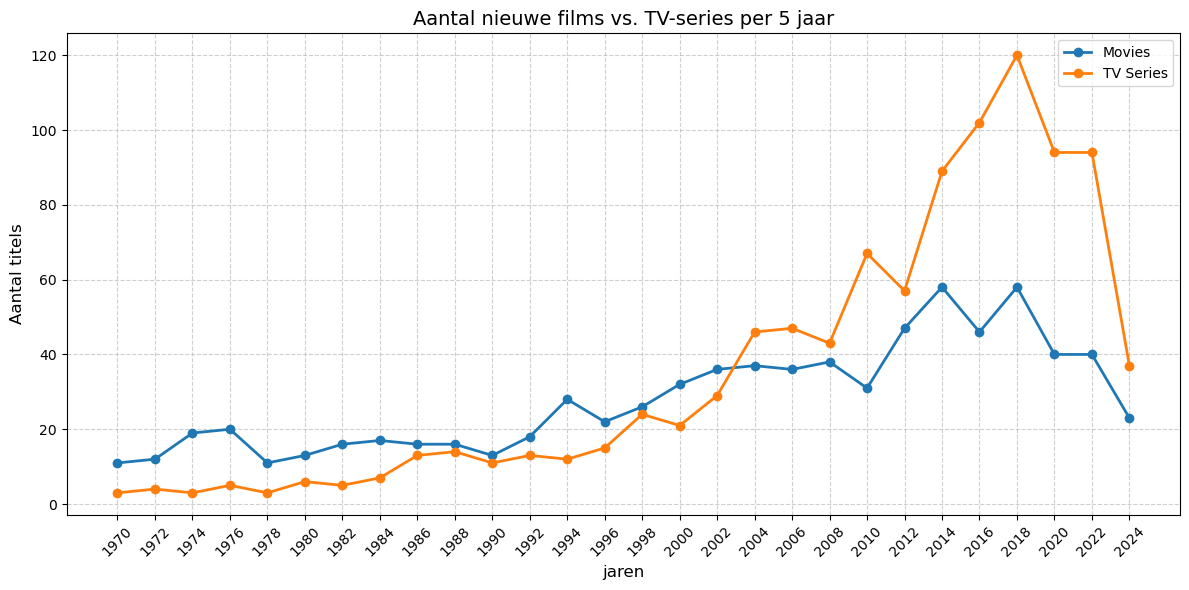

In [93]:
movies = pd.read_csv('data/movies.csv')
tvseries = pd.read_csv('data/tvseries.csv')

# Functie om jaren af te ronden naar 5-jarige intervallen
def round_to_5yr(year):
    return (year // 2) * 2

# Rond alle releaseYear af
movies['releasePeriod'] = movies['releaseYear'].apply(round_to_5yr)
tvseries['releasePeriod'] = tvseries['releaseYear'].apply(round_to_5yr)

# Tel aantal titels per periode
movies_per_period = movies['releasePeriod'].value_counts().sort_index()
tvseries_per_period = tvseries['releasePeriod'].value_counts().sort_index()

# Combineer in één DataFrame
combined = pd.DataFrame({
    'Movies': movies_per_period,
    'TV Series': tvseries_per_period
}).fillna(0).astype(int)

# Zorg dat alle 5-jaarlijkse perioden van 1970 t/m 2020 aanwezig zijn
all_periods = list(range(1970, 2026, 2))  # 1970, 1975, ..., 2020
combined = combined.reindex(all_periods, fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(combined.index, combined['Movies'], label='Movies', marker='o', linewidth=2)
plt.plot(combined.index, combined['TV Series'], label='TV Series', marker='o', linewidth=2)

# Titel en labels
plt.title('Aantal nieuwe films vs. TV-series per 5 jaar', fontsize=14)
plt.xlabel('jaren', fontsize=12)
plt.ylabel('Aantal titels', fontsize=12)
plt.xticks(combined.index, rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

In deze grafiek wordt een vergelijking gemaakt tussen aantal titels in de top 1000 die gepubliceerd is per jaar. In de Y-as wordt het aantal titels aangegeven en in de X-as wordt de jaren aangegeven. Vervolgens geeft de blauwe lijn de aantal gepubliceerde films en de oranje lijn de aantal gepubliceerde series. Uit de grafiek kunnen we halen hoeveel series en films er gepubliceerd wordt per jaar. Gecombineerd kunnen we zien hoe de films en series publicaties is gestegen door de jaren heen.

# Argument 3

UIt de grafiek zien we dus dat films aanzienlijk meer stemmen ontvangen dan tv-series, dit verschil kan worden verklaard doordat dfilms over het algemeen korter zijn en daardoor dus makkelijker en sneller bekeken worden. Ze zijn dus toegankelijker voor een breder publiek, waardoor er dus ook meer stemmen en beoordelingen zijn. 

# Argument 4

Films blijven voornamelijk in het 7.9-8.1 bereik. Series domineren consistent vanaf 8.3 tot 9.5. Opmerkelijk is dat bij 8.2 nog gelijkheid is, maar daarna hebben series duidelijk hogere scores. Dus hoewel films meer stemmen krijgt. Dit suggeert dat series meer wordt gewaardeerd dan films. 

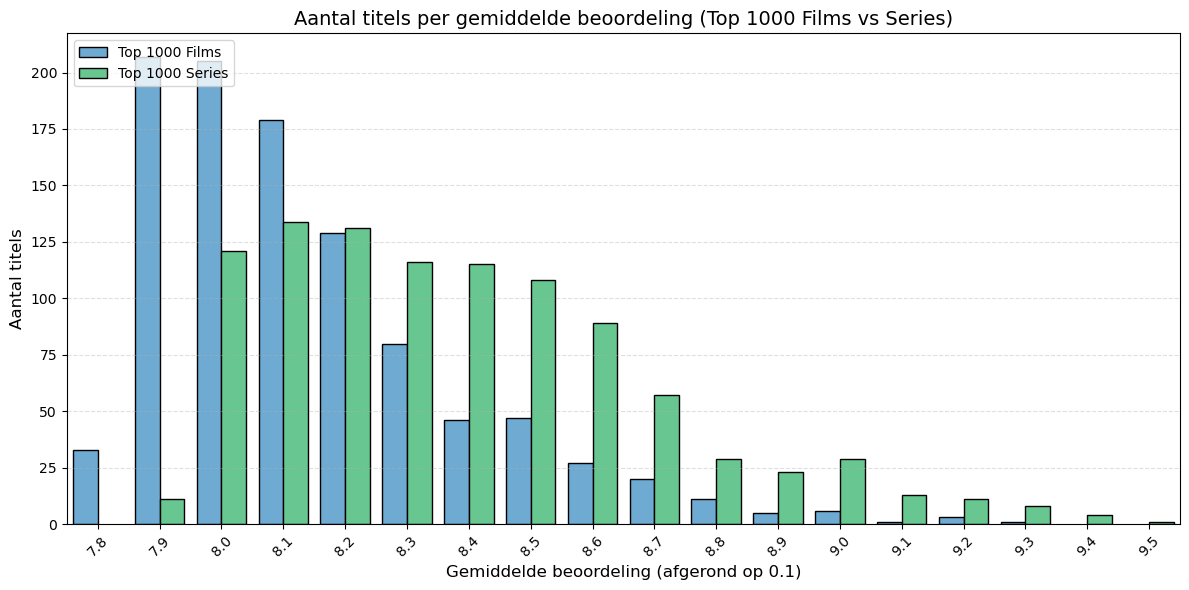

In [94]:
# Load data
movies_df = pd.read_csv("data/movies.csv")
series_df = pd.read_csv("data/tvseries.csv")

# Count number of titles per rating
movies_counts = movies_df["averageRating"].value_counts().sort_index()
series_counts = series_df["averageRating"].value_counts().sort_index()

# Combine into one DataFrame
combined_df = pd.DataFrame({
    "rating": movies_counts.index.tolist() + series_counts.index.tolist(),
    "count": list(movies_counts.values) + list(series_counts.values),
    "type": ["Top 1000 Films"] * len(movies_counts) + ["Top 1000 Series"] * len(series_counts)
})

# Round ratings to 1 decimal for nicer grouping
combined_df["rating"] = combined_df["rating"].round(1)

# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=combined_df,
    x="rating",
    y="count",
    hue="type",
    palette=["#5DADE2", "#58D68D"],
    edgecolor="black"

)

plt.title("Aantal titels per gemiddelde beoordeling (Top 1000 Films vs Series)", fontsize=14)
plt.xlabel("Gemiddelde beoordeling (afgerond op 0.1)", fontsize=12)
plt.ylabel("Aantal titels", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title="", loc="upper left")
plt.tight_layout()
plt.show()

In deze grafiek wordt een vergelijking gemaakt tussen aantal films met een bepaald rating. In de Y-as wordt de aantal films en series van de top 1000 aangegeven en in de X-as de ratingen. De blauwe balk geeft de aantal films aan en de groene balk geeft de aantal series aan. Hieruit kunnen we zien hoeveel films en series een bepaald rating heeft.

# Argument 5

De gemiddelde rating per genre is voor tv series natuurlijk hoger dan films dan ook. Over het algemeen zien we dat voor movies het allemaal rond de 8.1-8.2 zit voor elke genre, terwijl voor tv series de meeste zitten op 8.3 tot 8.4. Daarnaast zien we dat oorlogsseries een 8.7 rating scoren, en documentseries met 8.6. Dit zijn zeer hoge ratings vergeleken met de andere genres die rond de 8.1-8.2 zitten. OOk familie, geschiedenis, gameshows presteren goed met een gemiddelde van 8.5. We kunnen dus concluderen dat series domineren vanaf 8.3 tot aan de top van de ratingschaal. 















In [95]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Laad beide datasets
movies_data = pd.read_csv('data/movies.csv')
series_data = pd.read_csv('data/tvseries.csv')

# Functie om data voor te bereiden
def prepare_data(data):
    data_exploded = data.assign(genres=data['genres'].str.split(', ')).explode('genres')
    genre_counts = data_exploded['genres'].value_counts()
    top_genres = genre_counts[genre_counts > 10].index
    filtered_data = data_exploded[data_exploded['genres'].isin(top_genres)]
    return filtered_data, top_genres

# Bereid beide datasets voor
movies_filtered, movies_genres = prepare_data(movies_data)
series_filtered, series_genres = prepare_data(series_data)

# Alle unieke genres voor de genre dropdown
all_genres = sorted(set(movies_genres) | set(series_genres))

# Vind gemeenschappelijke genres voor vergelijking
common_genres = list(set(movies_genres) & set(series_genres))
common_genres.sort()

# Maak een gecombineerde figuur
fig = go.Figure()

# Keep track of trace information for proper filtering
trace_info = []

# Voeg movie traces toe (standaard onzichtbaar)
movies_fig = px.box(movies_filtered,
                    x='genres',
                    y='averageRating',
                    color='genres',
                    points='outliers',
                    hover_data=['title'])

for trace in movies_fig.data:
    trace.visible = False
    genre_name = trace.name.replace('genres=', '')
    trace.name = f"Films - {genre_name}"
    trace.legendgroup = "films"
    fig.add_trace(trace)
    trace_info.append({'type': 'movies', 'genre': genre_name})

# Voeg series traces toe (standaard onzichtbaar)  
series_fig = px.box(series_filtered,
                    x='genres', 
                    y='averageRating',
                    color='genres',
                    points='outliers',
                    hover_data=['title'])

for trace in series_fig.data:
    trace.visible = False
    genre_name = trace.name.replace('genres=', '')
    trace.name = f"Series - {genre_name}"
    trace.legendgroup = "series"
    fig.add_trace(trace)
    trace_info.append({'type': 'series', 'genre': genre_name})

# Voeg vergelijkingstraces toe voor gemeenschappelijke genres (standaard zichtbaar)
for genre in common_genres:
    # Films data voor dit genre
    movies_genre_data = movies_filtered[movies_filtered['genres'] == genre]
    fig.add_trace(go.Box(
        y=movies_genre_data['averageRating'],
        x=[f"{genre} - Films"] * len(movies_genre_data),
        name=f"Films - {genre}",
        marker_color=px.colors.qualitative.Plotly[common_genres.index(genre) % len(px.colors.qualitative.Plotly)],
        boxpoints='outliers',
        customdata=movies_genre_data[['title']],
        hovertemplate='<b>%{x}</b><br>Rating: %{y}<br>Titel: %{customdata[0]}<extra></extra>',
        visible=True,
        legendgroup="comparison"
    ))
    trace_info.append({'type': 'comparison_movies', 'genre': genre})
    
    # Series data voor dit genre
    series_genre_data = series_filtered[series_filtered['genres'] == genre]
    fig.add_trace(go.Box(
        y=series_genre_data['averageRating'],
        x=[f"{genre} - Series"] * len(series_genre_data),
        name=f"Series - {genre}",
        marker_color=px.colors.qualitative.Plotly[common_genres.index(genre) % len(px.colors.qualitative.Plotly)],
        boxpoints='outliers',
        customdata=series_genre_data[['title']],
        hovertemplate='<b>%{x}</b><br>Rating: %{y}<br>Titel: %{customdata[0]}<extra></extra>',
        visible=True,
        opacity=0.6,
        legendgroup="comparison"
    ))
    trace_info.append({'type': 'comparison_series', 'genre': genre})

# Bereken counts
movies_count = len([t for t in trace_info if t['type'] == 'movies'])
series_count = len([t for t in trace_info if t['type'] == 'series'])
comparison_count = len([t for t in trace_info if t['type'].startswith('comparison')])

# Maak genre filter buttons dynamisch
def create_genre_buttons():
    # Alle genres button
    buttons = [{
        "label": "Alle genres",
        "method": "restyle",
        "args": [{"visible": [True] * len(trace_info)}]
    }]
    
    for genre in all_genres:
        # Maak visibility array voor dit genre
        visibility = []
        
        for trace in trace_info:
            # Show trace if it matches the selected genre
            visibility.append(trace['genre'] == genre)
        
        buttons.append({
            "label": genre,
            "method": "restyle", 
            "args": [{"visible": visibility}]
        })
    
    return buttons

# Update layout
fig.update_layout(
    title='Vergelijking van films vs series per genre (hover over outliers voor titel)',
    updatemenus=[
        # Films/Series/Vergelijking schakelaar
        {
            "buttons": [
                {
                    "label": "Films",
                    "method": "update",
                    "args": [
                        {"visible": [t['type'] == 'movies' for t in trace_info]},
                        {"title": "Ratingverdeling per genre voor films (hover over outliers voor titel)"}
                    ]
                },
                {
                    "label": "Series",
                    "method": "update",
                    "args": [
                        {"visible": [t['type'] == 'series' for t in trace_info]},
                        {"title": "Ratingverdeling per genre voor series (hover over outliers voor titel)"}
                    ]
                },
                {
                    "label": "Vergelijking",
                    "method": "update",
                    "args": [
                        {"visible": [t['type'].startswith('comparison') for t in trace_info]},
                        {"title": "Vergelijking van films vs series per genre (hover over outliers voor titel)"}
                    ]
                }
            ],
            "direction": "down",
            "showactive": True,
            "active": 2,
            "x": 0.02,
            "xanchor": "left",
            "y": 1.1,
            "yanchor": "top"
        },
        # Genre filter - werkt op de momenteel zichtbare data
        {
            "buttons": create_genre_buttons(),
            "direction": "down",
            "showactive": True,
            "x": 0.15,
            "xanchor": "left",
            "y": 1.1,
            "yanchor": "top"
        }
    ],
    xaxis_title="Genre",
    yaxis_title="Gemiddelde IMDb-rating",
    height=600,
    hoverlabel=dict(bgcolor="white", font_size=13, font_family="Arial"),
    showlegend=False
)

fig.show()

In deze interactieve boxplot worden films en series vergeleken op basis van hun gemiddelde IMDb-rating per genre.
De Y-as toont de gemiddelde beoordeling, terwijl de X-as de verschillende genres weergeeft. Op de X-as staan combinaties van genre en categorie (bijvoorbeeld “Action – Films” en “Action – Series”), maar deze kunnen ook aangepast worden om alleen films of alleen series weer te geven. Daarnaast is het mogelijk om op een specifiek genre te filteren.

# Perspectief 2
Hoewel oude films en series minder spectaculair zijn vergeleken met moderne films en series, blijven ze wereldwijd geliefd vanwege hun echte verhalen met sterke personages en universele thema's. Alhoewel met de komst van de technologische vooruitgang in de filmindustrie, creëert het nieuwe mogelijkheden voor verhaalvertelling. Wat ervoor zorgt dat films nu nog steeds geliefd blijven.



# Argument 1
Films en series uit het verleden worden even goed gewaardeerd als films en series tegenwoordig. Hoge ratings van oude films tonen aan dat kwaliteit en verhaal universeel blijven aanspreken, zelfs zonder moderne technieken. De opmerkelijke stabiliteit en stijging van film- en serie scores is terug te zien in de grafiek gemiddelde films en series rating per jaar. Daaruit blijkt dat over de jaren heen de gemiddelde score steeds tussen  8 en 8.5 blijft en bijna niet lager dan een 8, maar juist zit te stijgen.

# Gemiddelde FilmRating per jaar

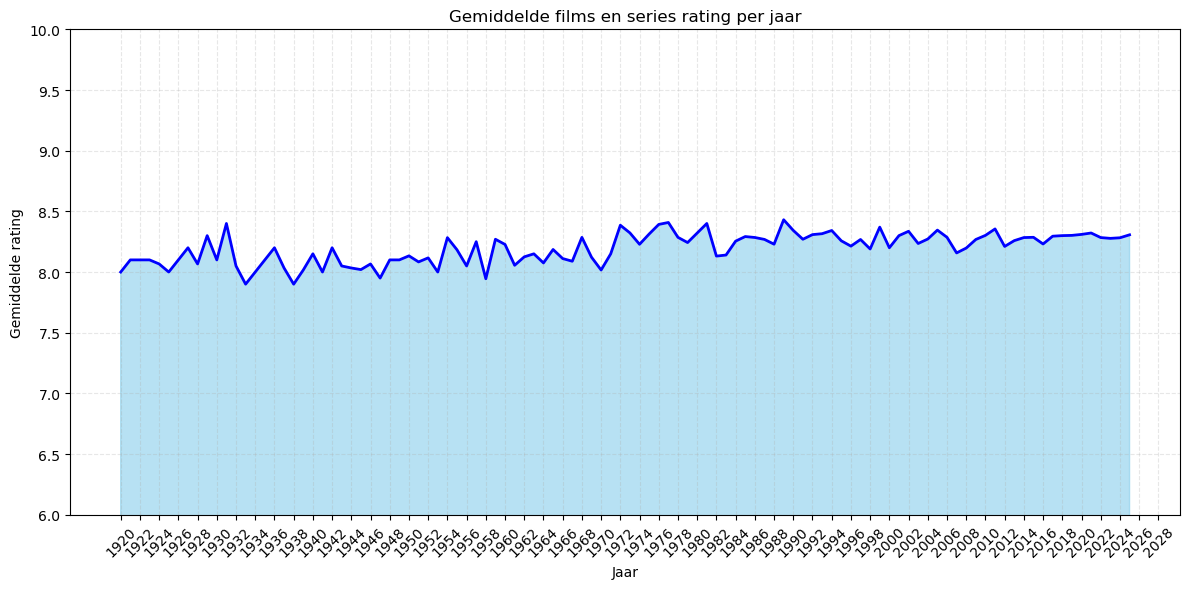

In [96]:
# Laad je data
df = pd.read_csv("data/combined_stats_by_year.csv")

# Bereken gemiddelde rating per jaar
avg_rating_by_year = df.groupby("releaseYear")["mean_rating"].mean()

# Plot als area plot
plt.figure(figsize=(12, 6))
plt.fill_between(avg_rating_by_year.index, avg_rating_by_year.values, color="skyblue", alpha=0.6)
plt.plot(avg_rating_by_year.index, avg_rating_by_year.values, color="blue", linewidth=2)

plt.title("Gemiddelde films en series rating per jaar")
plt.xlabel("Jaar")
plt.ylabel("Gemiddelde rating")
plt.ylim(6, 10)  # Forceer y-as van 6 tot 10
plt.grid(alpha=0.3, linestyle="--")
plt.xticks(
    range(avg_rating_by_year.index.min(), avg_rating_by_year.index.max() + 4, 2),  # Om de 5 jaar
    rotation=45
)

plt.tight_layout()
plt.show()

In deze grafiek wordt een vergelijking gemaakt tussen de gemiddelde rating van alle films en series van elk jaar. In de Y-as wordt de gemiddelde rating aangegeven en in de X-as wordt de jaren aangegeven. Uit de grafiek kunnen we halen wat de gemiddelde rating is van alle films en series van een bepaald jaar. En zo kunnen we zien welk jaar een hogere gemiddelde rating heeft vergeleken met andere jaren.

# Argument 2
Een ander patroon dat duidelijker wordt met behulp van deze grafiek is dat bepaalde genres in de loop der tijd structureel beter gewaardeerd worden. Waarbij technologische ontwikkeling een cruciale rol speelt. Zo laat de grafiek zien dat genres zoals sci-fi en animatie buitengewoon goed gewaardeerd worden, vaak na de jaren 90 scoren ze boven het algemene gemiddelde. Deze technologische ontwikkeling is met name te danken aan innovaties zoals CGI, motion capture en 3D-rendering. Vooral sci-fi weet met deze technologie het publiek te trekken met futuristische werelden en geloofwaardige special effects. 


# Gemiddelde GenreRating Per jaar

In [98]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from scipy import stats
from collections import Counter

# Laad de gecombineerde dataset
try:
    df = pd.read_csv('data/combined_stats_by_genre_year.csv')
    # Laad ook de overall yearly data voor de regressielijn
    df_yearly = pd.read_csv('data/combined_stats_by_year.csv')
    
    # Gegevens opschonen - START EERDER!
    df_clean = df.dropna(subset=['releaseYear', 'mean_rating', 'genre'])
    df_clean = df_clean[(df_clean['releaseYear'] >= 1920) & (df_clean['releaseYear'] <= 2024)] 
    df_clean = df_clean[(df_clean['mean_rating'] >= 0) & (df_clean['mean_rating'] <= 10)]
    
    # Extraheer individuele genres en maak aparte rijen
    genre_rows = []
    for _, row in df_clean.iterrows():
        genres_str = str(row['genre'])
        individual_genres = [g.strip() for g in genres_str.split(',')]
        
        for genre in individual_genres:
            if genre and genre != 'nan':
                genre_rows.append({
                    'releaseYear': row['releaseYear'],
                    'mean_rating': row['mean_rating'],
                    'genre': genre,
                    'unique_titles_count': row['unique_titles_count']
                })
    
    genre_df = pd.DataFrame(genre_rows)
    
    # Selecteer genres met voldoende data
    genre_counts = Counter(genre_df['genre'])
    top_genres = [genre for genre, count in genre_counts.items() if count >= 15]
    top_genres = sorted(top_genres)
    
    # Filter op topgenres
    top_genre_df = genre_df[genre_df['genre'].isin(top_genres)]
    
    # Groepeer per genre en jaar
    trend_data = top_genre_df.groupby(['genre', 'releaseYear']).agg({
        'mean_rating': 'mean',
        'unique_titles_count': 'sum'
    }).reset_index()
    
    # Bereken OVERALL regressielijn voor alle genres samen
    # Filter yearly data op dezelfde periode
    df_yearly_clean = df_yearly.dropna(subset=['releaseYear', 'mean_rating'])
    df_yearly_clean = df_yearly_clean[(df_yearly_clean['releaseYear'] >= 1920) & (df_yearly_clean['releaseYear'] <= 2024)]
    df_yearly_clean = df_yearly_clean[(df_yearly_clean['mean_rating'] >= 0) & (df_yearly_clean['mean_rating'] <= 10)]
    
    # Linear regression voor overall trend
    x_overall = df_yearly_clean['releaseYear'].values
    y_overall = df_yearly_clean['mean_rating'].values
    
    slope_overall, intercept_overall, r_value_overall, p_value_overall, std_err_overall = stats.linregress(x_overall, y_overall)
    
    # Maak overall regressielijn
    x_reg_overall = np.array([x_overall.min(), x_overall.max()])
    y_reg_overall = slope_overall * x_reg_overall + intercept_overall
    
    # Overall statistieken
    overall_stats = {
        'slope': slope_overall,
        'r_squared': r_value_overall**2,
        'p_value': p_value_overall,
        'trend': 'Stijgend' if slope_overall > 0 else 'Dalend',
        'significance': 'Significant' if p_value_overall < 0.05 else 'Niet significant'
    }
    
    # Maak de grafiek
    fig = go.Figure()
    
    # Voeg datapunten toe voor elk genre
    for genre in top_genres:
        genre_data = trend_data[trend_data['genre'] == genre]
        
        # Scatter plot met werkelijke data
        fig.add_trace(go.Scatter(
            x=genre_data['releaseYear'],
            y=genre_data['mean_rating'],
            mode='markers+lines',
            name=genre,
            line=dict(width=2),
            marker=dict(size=6),
            visible='legendonly' if genre != top_genres[0] else True,
            legendgroup=genre,
            showlegend=True
        ))
    
    # Voeg de OVERALL regressielijn toe (voor alle genres samen)
    fig.add_trace(go.Scatter(
        x=x_reg_overall,
        y=y_reg_overall,
        mode='lines',
        name='Overall Trend (Alle Genres)',
        line=dict(width=4, dash='solid', color='red'),
        visible=True,
        showlegend=True,
        hovertemplate='<b>Overall Trend</b><br>Jaar: %{x}<br>Gemiddelde Rating: %{y:.2f}<extra></extra>'
    ))
    
    # Voeg ook de werkelijke yearly data toe als referentie
    fig.add_trace(go.Scatter(
        x=df_yearly_clean['releaseYear'],
        y=df_yearly_clean['mean_rating'],
        mode='markers',
        name='Werkelijke Jaargemiddelden',
        marker=dict(size=4, color='red', opacity=0.6),
        visible=True,
        showlegend=True,
        hovertemplate='<b>Werkelijk Jaargemiddelde</b><br>Jaar: %{x}<br>Gemiddelde Rating: %{y:.2f}<extra></extra>'
    ))
    
    # Create highlight buttons for each genre
    highlight_buttons = []
    
    # Reset button (no highlight)
    visibility_reset = []
    line_widths_reset = []
    marker_sizes_reset = []
    
    for i, genre in enumerate(top_genres):
        visibility_reset.append('legendonly' if genre != top_genres[0] else True)
        line_widths_reset.append(2)  # Normal width
        marker_sizes_reset.append(6)  # Normal size
    
    # Add visibility for non-genre traces (overall trend and yearly data)
    visibility_reset.extend([True, True])
    line_widths_reset.extend([4, None])  # Overall trend keeps its width, yearly data has no line
    marker_sizes_reset.extend([None, 4])  # Overall trend has no markers, yearly data keeps its size
    
    highlight_buttons.append(dict(
        args=[{
            "visible": visibility_reset,
            "line.width": line_widths_reset,
            "marker.size": marker_sizes_reset
        }],
        label="Reset Highlight",
        method="restyle"
    ))
    
    # Create highlight button for each genre
    for highlight_genre in top_genres:
        visibility_highlight = []
        line_widths_highlight = []
        marker_sizes_highlight = []
        
        for i, genre in enumerate(top_genres):
            if genre == highlight_genre:
                visibility_highlight.append(True)  # Always show highlighted genre
                line_widths_highlight.append(1.5)  # Thicker line for highlighted genre
                marker_sizes_highlight.append(10)  # Larger markers for highlighted genre
            else:
                visibility_highlight.append('legendonly')  # Hide other genres
                line_widths_highlight.append(1)  # Thinner lines for non-highlighted
                marker_sizes_highlight.append(4)  # Smaller markers for non-highlighted
        
        # Add visibility for non-genre traces (overall trend and yearly data)
        visibility_highlight.extend([True, True])
        line_widths_highlight.extend([2, None])  # Make overall trend thinner when highlighting
        marker_sizes_highlight.extend([None, 3])  # Make yearly data markers smaller
        
        highlight_buttons.append(dict(
            args=[{
                "visible": visibility_highlight,
                "line.width": line_widths_highlight,
                "marker.size": marker_sizes_highlight
            }],
            label=f"Highlight {highlight_genre}",
            method="restyle"
        ))
    
    # Update layout with enhanced button menu
    fig.update_layout(
        title='Genre Rating Trends met Highlight Feature (1960-2025)<br><sub>Rode lijn toont overall trend | Gebruik knoppen om genres te highlighten</sub>',
        width=1400,
        height=800,
        title_font_size=16,
        title_x=0.5,
        xaxis_title="Jaar",
        yaxis_title="Gemiddelde Rating",
        legend_title="Genre",
        hovermode='closest',
        xaxis=dict(dtick=5),
        legend=dict(
            orientation="v",
            yanchor="top",
            y=1,
            xanchor="left",
            x=1.01
        ),
        margin=dict(r=200, t=120),  # Extra top margin for buttons
        # Enhanced button menu
        updatemenus=[
            # Visibility control buttons
            dict(
                type="buttons",
                direction="left",
                buttons=list([
                    dict(
                        args=[{"visible": [True] * len(fig.data)}],
                        label="Show All",
                        method="restyle"
                    ),
                    dict(
                        args=[{"visible": ['legendonly'] * len(top_genres) + [True, True]}],  # Keep overall trend visible
                        label="Hide All Genres",
                        method="restyle"
                    )
                ]),
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.01,
                xanchor="left",
                y=1.08,
                yanchor="top"
            ),
            # Highlight control buttons
            dict(
                type="dropdown",
                direction="down",
                buttons=highlight_buttons,
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.195,
                xanchor="left",
                y=1.08,
                yanchor="top"
            )
        ],
        annotations=[
            dict(
                text="Visibility Controls:",
                x=0.01, y=1.12,
                xref="paper", yref="paper",
                showarrow=False,
                font=dict(size=12, color="black")
            ),
            dict(
                text="Highlight Genre:",
                x=0.25, y=1.12,
                xref="paper", yref="paper",
                showarrow=False,
                font=dict(size=12, color="black")
            )
        ]
    )
    
    # Toon de grafiek
    fig.show()

except FileNotFoundError:
    pass
except Exception as e:
    pass

Deze interactieve lijnplot toont de gemiddelde IMDb-rating per jaar. Op de X-as staat het releasejaar, en op de Y-as de gemiddelde rating. De rode lijn toont de lineaire regressie over alle genres samen. De rode puntjes geven het werkelijk jaargemiddelde aan van alle genres.
Aan de rechterkant van de grafiek bevindt zich een keuzemenu voor genres, waarmee er individuele genres kunnen worde in- of uitgeschakelt. Met de knoppen bovenaan kun je alle genres tonen of verbergen, en de highlight aanpassen voor focus.